In [18]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

In [19]:
df = pd.read_csv('supply_chain.csv')
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [20]:
df.describe() # it return staticly view of data.. only of numerical data colum

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


Now let's get started with analyzing the supply Chain by looking at the relationship between the proce of the products and the revenue generated by them:

In [21]:
fig = px.scatter(df, x='Price',
                 y='Revenue generated',
                 color='Product type',
                 hover_data=['Number of products sold'],
                 trendline='ols')
fig.show()

Now

In [22]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold',
                   names='Product type',
                   title='Sales by Product Ttype',
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence = px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics. Now let's have a look at the total revenue generated from shipping carriers:



In [23]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue generated')
fig.show()

In [24]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs,
                  on='Product type')
result.rename(columns={'Lead time':'Average Lead Time',
                       'Manufacturing costs':'Average Manufacturing Costs'},
              inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


In [25]:
revenue_chart = px.line(df, x='SKU',
                        y="Revenue generated",
                        title='Revenue Generated by SKU')
revenue_chart.show()

In [26]:
stock_chart = px.line(df,x='SKU',
                      y='Stock levels',
                      title='Stock Levels by SKU')
stock_chart.show()

In [27]:
order_quantity_chart = px.bar(df,x='SKU',
                              y='Order quantities',
                              title='Order Quantity by SKU')
order_quantity_chart.show()

In [28]:
shipping_cost_chart = px.bar(df, x='Shipping carriers',
                            y='Shipping costs',
                            title='Shipping Costs by Carrier')
shipping_cost_chart.show()

In [29]:
transportation_chart = px.pie(df,
                             values='Costs',
                             names='Transportation modes',
                             title='Cost Distribution by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

In [30]:
defect_rates_by_product = df.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
            title='Average Defect Rates by Product Type')
fig.show()

In [31]:
pivot_table = pd.pivot_table(df, values='Defect rates',
                            index=['Transportation modes'],
                            aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"],
                             names=pivot_table.index,
                             title='Defect Rates by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
linkedin_df = pd.read_csv("linkedin-reviews.csv")
linkedin_df.head(10)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
5,This app is poor and bad. Linkedin app on my H...,1
6,Finally,5
7,Have been using DroidIn. Ability to move to SD...,4
8,Works fine on Samsung Captivate.,4
9,Clean design with limited features. How about ...,3


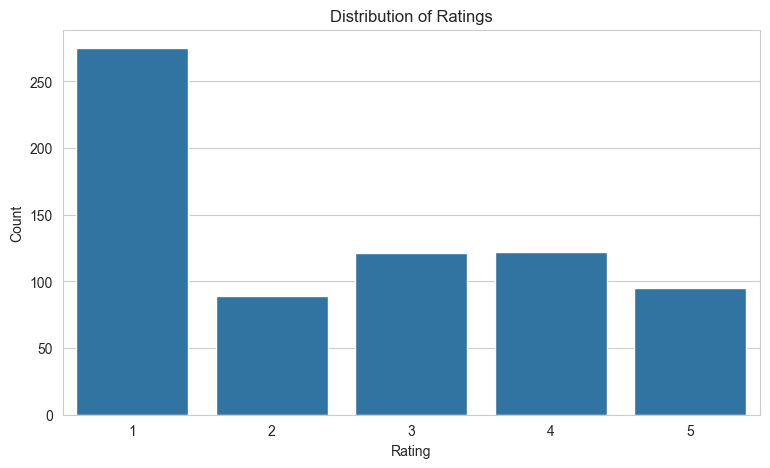

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(9, 5))

sns.countplot(data=linkedin_df, x="Rating")

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [35]:
from textblob import TextBlob


def textblob_sentiment_analysis(review):

    sentiment = TextBlob(review).sentiment


    if sentiment.polarity > 0.1:
        return "Positive"
    elif sentiment.polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"


linkedin_df["Sentiment"] = linkedin_df["Review"].apply(
    textblob_sentiment_analysis)

print(linkedin_df.sample(5))

                                                Review  Rating Sentiment
52   Forces close on every action was working till ...       3   Neutral
32   No 'Group' updates or even views. No real valu...       3   Neutral
399                              Dead after new update       1   Neutral
414  Not working on my phone since last few updates...       1   Neutral
30   Non-market beta worked well, but the full rele...       1  Positive


In [36]:
sentiment_distribution = linkedin_df["Sentiment"].value_counts()
sentiment_distribution


Sentiment
Neutral     300
Positive    295
Negative    107
Name: count, dtype: int64